In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import xarray as xr
import glob

# Path to your directory containing the NetCDF files
path = '/content/drive/MyDrive/mars_reanalysis/'

# Get a list of all NetCDF files in the directory
file_list = sorted(glob.glob(path + 'emars_*.nc'))

# # Optionally: create a list of datasets
# datasets = []

for file in file_list[:1]:
    ds = xr.open_dataset(file)
    # ds_normalized = (ds - ds_min) / (ds_max - ds_min)

In [3]:
#!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls090-120.nc

In [4]:
!ls

drive  sample_data


In [5]:
# import xarray as xr
# ds = xr.open_dataset('emars_v1.0_anal_mean_MY24_Ls090-120.nc')
# ds

In [ ]:
vars = ['T', 'U', 'V']
ds[vars]

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 840, pfull: 28, lat: 36, lon: 60, latu: 36, lonv: 60)
Coordinates:
  * lat      (lat) float64 288B -88.71 -84.86 -79.71 ... 79.71 84.86 88.71
  * latu     (latu) float64 288B -87.43 -87.43 -82.29 ... 77.14 82.29 87.43
  * lon      (lon) float64 480B 3.0 9.0 15.0 21.0 ... 339.0 345.0 351.0 357.0
  * lonv     (lonv) float64 480B 0.0 6.0 12.0 18.0 ... 336.0 342.0 348.0 354.0
  * pfull    (pfull) float64 224B 0.0003547 0.001128 0.003582 ... 7.61 7.674
  * time     (time) float64 7kB 0.0 1.0 2.0 3.0 4.0 ... 836.0 837.0 838.0 839.0
Data variables:
    T        (time, pfull, lat, lon) float64 406MB ...
    U        (time, pfull, latu, lon) float64 406MB ...
    V        (time, pfull, lat, lonv) float64 406MB ...

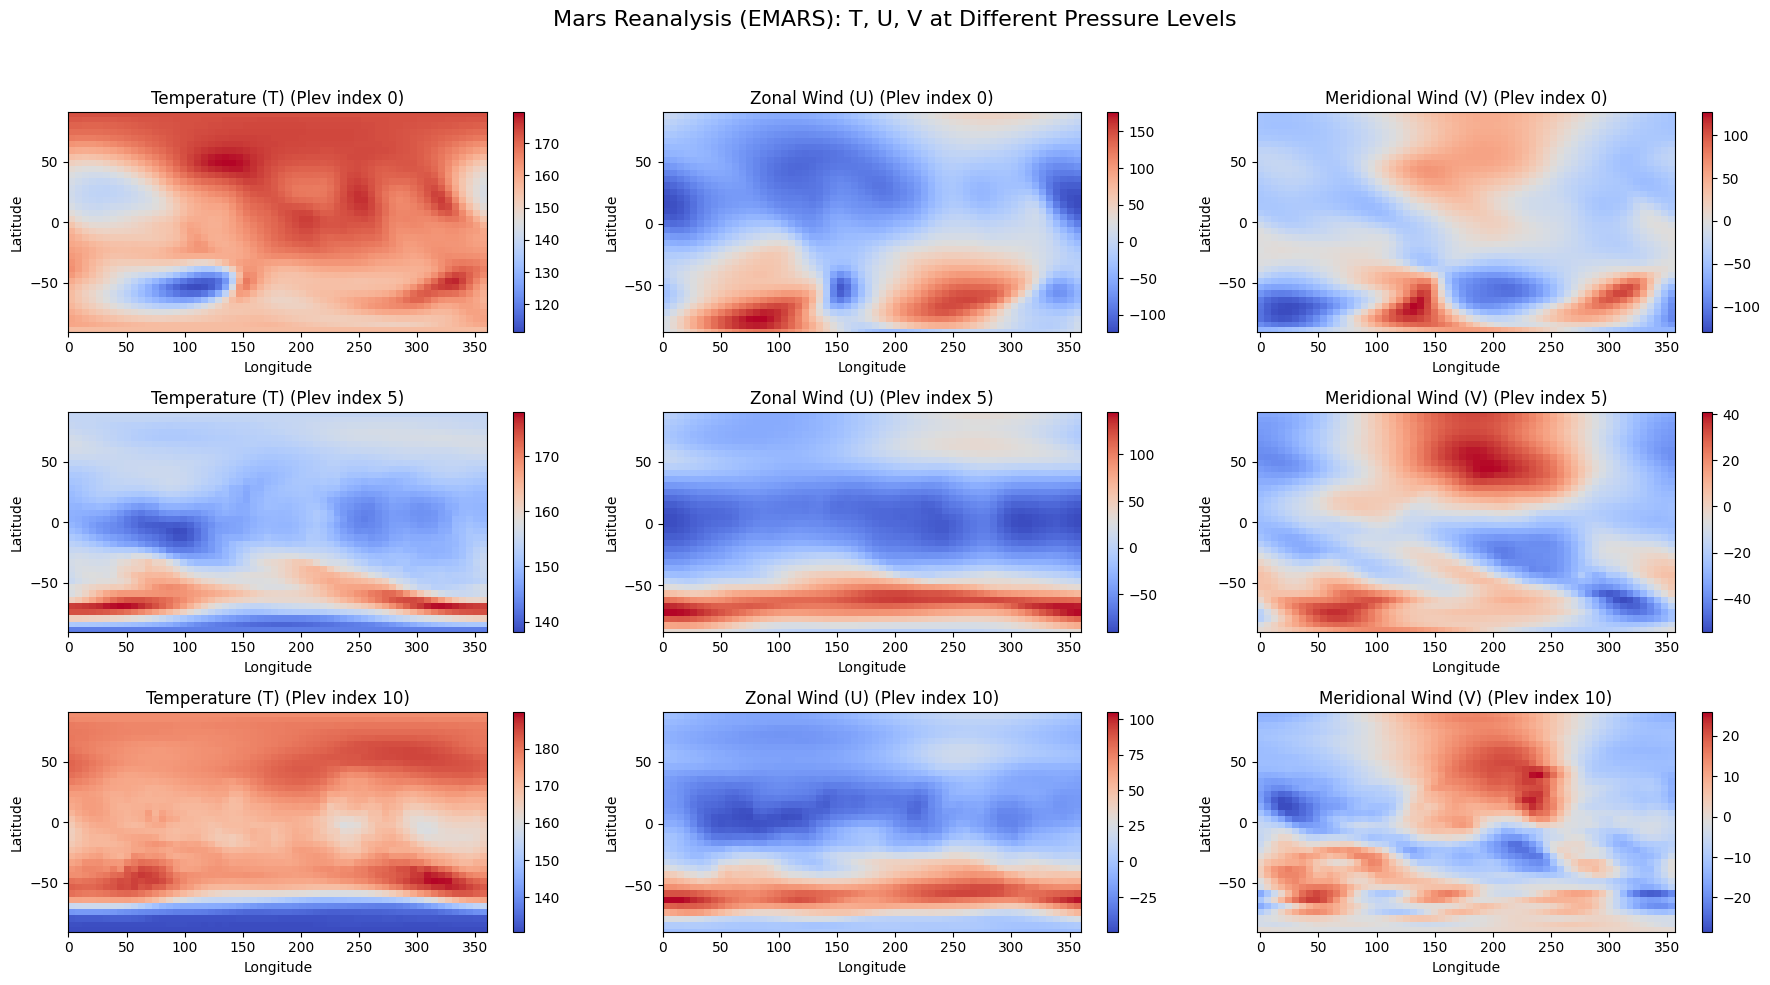

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# # Load dataset
# ds = xr.open_dataset("emars_v1.0_anal_mean_MY24_Ls090-120.nc")  # adjust filename as needed

# Select one time step and pressure levels
time_index = 0
plev_indices = [0, 5, 10]  # Choose your pressure level indices

# Create a figure
fig, axs = plt.subplots(len(plev_indices), 3, figsize=(18, 10))
fig.suptitle("Mars Reanalysis (EMARS): T, U, V at Different Pressure Levels", fontsize=16)

# Titles for subplots
titles = ['Temperature (T)', 'Zonal Wind (U)', 'Meridional Wind (V)']

for i, p in enumerate(plev_indices):
    # Temperature (T): lat, lon
    T = ds['T'].isel(time=time_index, pfull=p)
    pcm_T = axs[i, 0].pcolormesh(ds['lon'], ds['lat'], T, shading='auto', cmap='coolwarm')
    axs[i, 0].set_title(f"{titles[0]} (Plev index {p})")
    plt.colorbar(pcm_T, ax=axs[i, 0])

    # Zonal Wind (U): latu, lon
    U = ds['U'].isel(time=time_index, pfull=p)
    pcm_U = axs[i, 1].pcolormesh(ds['lon'], ds['latu'], U, shading='auto', cmap='coolwarm')
    axs[i, 1].set_title(f"{titles[1]} (Plev index {p})")
    plt.colorbar(pcm_U, ax=axs[i, 1])

    # Meridional Wind (V): lat, lonv
    V = ds['V'].isel(time=time_index, pfull=p)
    pcm_V = axs[i, 2].pcolormesh(ds['lonv'], ds['lat'], V, shading='auto', cmap='coolwarm')
    axs[i, 2].set_title(f"{titles[2]} (Plev index {p})")
    plt.colorbar(pcm_V, ax=axs[i, 2])

    for j in range(3):
        axs[i, j].set_xlabel("Longitude")
        axs[i, j].set_ylabel("Latitude")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
nc_files = [
    "emars_v1.0_anal_mean_MY24_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY24_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY24_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY24_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY24_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY24_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY24_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY24_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY24_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY25_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY25_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY25_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY25_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY25_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY25_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY25_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY25_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY25_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY25_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY25_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY25_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY26_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY26_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY26_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY26_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY26_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY26_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY26_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY26_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY26_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY26_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY26_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY26_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY27_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY27_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY27_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY27_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY28_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY28_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY28_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY28_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY28_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY28_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY28_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY28_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY28_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY29_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY29_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY29_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY29_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY29_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY29_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY29_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY29_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY29_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY29_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY29_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY29_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY30_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY30_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY30_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY30_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY30_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY30_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY30_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY30_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY30_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY30_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY30_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY30_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY31_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY31_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY31_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY31_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY31_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY31_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY31_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY31_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY31_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY31_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY31_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY31_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY32_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY32_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY32_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY32_Ls090-120.nc",
    "emars_v1.0_anal_mean_MY32_Ls120-150.nc",
    "emars_v1.0_anal_mean_MY32_Ls150-180.nc",
    "emars_v1.0_anal_mean_MY32_Ls180-210.nc",
    "emars_v1.0_anal_mean_MY32_Ls210-240.nc",
    "emars_v1.0_anal_mean_MY32_Ls240-270.nc",
    "emars_v1.0_anal_mean_MY32_Ls270-300.nc",
    "emars_v1.0_anal_mean_MY32_Ls300-330.nc",
    "emars_v1.0_anal_mean_MY32_Ls330-360.nc",
    "emars_v1.0_anal_mean_MY33_Ls000-030.nc",
    "emars_v1.0_anal_mean_MY33_Ls030-060.nc",
    "emars_v1.0_anal_mean_MY33_Ls060-090.nc",
    "emars_v1.0_anal_mean_MY33_Ls090-120.nc"
]

In [ ]:
base_url = "https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/"

for file in nc_files:
    print(f"!wget {base_url}{file}")

!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls090-120.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls120-150.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls150-180.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls180-210.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls210-240.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls240-270.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls270-300.nc
!wget https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls300-330.nc
!wget https://www.dataco

In [ ]:
base_url = "https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/"

for file in nc_files:
    !wget {base_url + file}

--2025-05-06 18:04:03--  https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls090-120.nc
Resolving www.datacommons.psu.edu (www.datacommons.psu.edu)... 128.118.15.248, 2610:8:1:dc60:88db:7e07:4e59:dba2
Connecting to www.datacommons.psu.edu (www.datacommons.psu.edu)|128.118.15.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1233902176 (1.1G) [application/x-netcdf]
Saving to: ‘emars_v1.0_anal_mean_MY24_Ls090-120.nc.1’

emars_v1.0_anal_mea 100%[===================>]   1.15G  10.2MB/s    in 2m 9s   

2025-05-06 18:06:12 (9.09 MB/s) - ‘emars_v1.0_anal_mean_MY24_Ls090-120.nc.1’ saved [1233902176/1233902176]

--2025-05-06 18:06:12--  https://www.datacommons.psu.edu/download/meteorology/greybush/emars-1p0/data/emars_v1.0_anal_mean_MY24_Ls120-150.nc
Resolving www.datacommons.psu.edu (www.datacommons.psu.edu)... 128.118.15.248, 2610:8:1:dc60:88db:7e07:4e59:dba2
Connecting to www.datacommons.psu.edu (www.datacommons

In [ ]:
!pwd

/content


In [ ]:
!mkdir mars_reanalysis

In [ ]:
!mv *.nc mars_reanalysis/

In [ ]:
!du -sh mars_reanalysis/

176G	mars_reanalysis/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp -r mars_reanalysis/ drive/MyDrive/

In [ ]:
ds = xr.open_mfdataset('mars_reanalysis/*.nc')
ds

<xarray.Dataset> Size: 1GB
Dimensions:               (time: 792, lat: 36, lon: 60, pfull: 28, latu: 36,
                           lonv: 60, phalf: 29)
Coordinates:
  * lat                   (lat) float64 288B -88.71 -84.86 ... 84.86 88.71
  * latu                  (latu) float64 288B -87.43 -87.43 ... 82.29 87.43
  * lon                   (lon) float64 480B 3.0 9.0 15.0 ... 345.0 351.0 357.0
  * lonv                  (lonv) float64 480B 0.0 6.0 12.0 ... 342.0 348.0 354.0
  * pfull                 (pfull) float64 224B 0.0003547 0.001128 ... 7.61 7.674
  * phalf                 (phalf) float64 232B 0.0002 0.0005738 ... 7.648 7.7
  * time                  (time) float64 6kB 0.0 1.0 2.0 ... 789.0 790.0 791.0
Data variables: (12/19)
    Ls                    (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    MY                    (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    Surface_geopotential  (time, lat, lon) float64 14MB dask.array<chunksize=(792, 36, 60), meta=np.ndarray>
    T                     (time, pfull, lat, lon) float64 383MB dask.array<chunksize=(792, 28, 36, 60), meta=np.ndarray>
    U                     (time, pfull, latu, lon) float64 383MB dask.array<chunksize=(792, 28, 36, 60), meta=np.ndarray>
    V                     (time, pfull, lat, lonv) float64 383MB dask.array<chunksize=(792, 28, 36, 60), meta=np.ndarray>
    ...                    ...
    earth_year            (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    emars_sol             (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    macda_sol             (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    mars_hour             (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    mars_soy              (time) float64 6kB dask.array<chunksize=(792,), meta=np.ndarray>
    ps                    (time, lat, lon) float64 14MB dask.array<chunksize=(792, 36, 60), meta=np.ndarray>

In [ ]:
import xarray as xr

# Assume `ds` is your xarray.Dataset
max_values = {dim: ds.max(dim='pfull').compute() for dim in ds.dims}
max_values

{'time': <xarray.Dataset> Size: 69MB
 Dimensions:               (time: 792, lat: 36, lon: 60, latu: 36, lonv: 60,
                            phalf: 29)
 Coordinates:
   * lat                   (lat) float64 288B -88.71 -84.86 ... 84.86 88.71
   * latu                  (latu) float64 288B -87.43 -87.43 ... 82.29 87.43
   * lon                   (lon) float64 480B 3.0 9.0 15.0 ... 345.0 351.0 357.0
   * lonv                  (lonv) float64 480B 0.0 6.0 12.0 ... 342.0 348.0 354.0
   * phalf                 (phalf) float64 232B 0.0002 0.0005738 ... 7.648 7.7
   * time                  (time) float64 6kB 0.0 1.0 2.0 ... 789.0 790.0 791.0
 Data variables: (12/19)
     Ls                    (time) float64 6kB 89.62 89.64 89.66 ... 104.7 104.7
     MY                    (time) float64 6kB 33.0 33.0 33.0 ... 33.0 33.0 33.0
     Surface_geopotential  (time, lat, lon) float64 14MB 1.183e+04 ... -1.047e+04
     T                     (time, lat, lon) float64 14MB 162.5 162.5 ... 222.0
     U      

In [ ]:
import xarray as xr
import json

# Assuming `ds` is your xarray.Dataset
max_vals = ds.max(dim="time").max(dim='lat').max(dim='lon').max(dim='lonv').max(dim='latu').compute()
min_vals = ds.min(dim="time").min(dim='lat').min(dim='lon').min(dim='lonv').min(dim='latu').compute()
max_vals

<xarray.Dataset> Size: 1kB
Dimensions:               (pfull: 28, phalf: 29)
Coordinates:
  * pfull                 (pfull) float64 224B 0.0003547 0.001128 ... 7.61 7.674
  * phalf                 (phalf) float64 232B 0.0002 0.0005738 ... 7.648 7.7
Data variables: (12/19)
    Ls                    float64 8B 104.7
    MY                    float64 8B 33.0
    Surface_geopotential  float64 8B 2.637e+04
    T                     (pfull) float64 224B 189.0 196.5 188.2 ... 254.3 255.2
    U                     (pfull) float64 224B 260.3 237.3 206.5 ... 33.32 31.03
    V                     (pfull) float64 224B 192.1 181.3 145.5 ... 36.66 35.32
    ...                    ...
    earth_year            float64 8B 2.016e+03
    emars_sol             float64 8B 7.094e+03
    macda_sol             float64 8B 6.242e+03
    mars_hour             float64 8B 23.0
    mars_soy              float64 8B 225.0
    ps                    float64 8B 1.338e+03

In [ ]:
max_vals.to_netcdf('max_vals_mars.nc')
min_vals.to_netcdf('min_vals_mars.nc')